In [2]:
from datetime import timedelta
import cv2
import numpy as np
import os

In [5]:
# то есть, если видео длительностью 30 секунд, сохраняется 1 кадр в секунду = всего сохраняется 30 кадров
SAVING_FRAMES_PER_SECOND = 1

In [6]:
def format_timedelta(td):
    """Служебная функция для классного форматирования объектов timedelta (например, 00:00:20.05)
    исключая микросекунды и сохраняя миллисекунды"""
    result = str(td)
    try:
        result, ms = result.split(".")
    except ValueError:
        return result + ".00".replace(":", "-")
    ms = int(ms)
    ms = round(ms / 1e4)
    return f"{result}.{ms:02}".replace(":", "-")
def get_saving_frames_durations(cap, saving_fps):
    """Функция, которая возвращает список длительностей, в которые следует сохранять кадры."""
    s = []
    # получаем продолжительность клипа, разделив количество кадров на количество кадров в секунду
    clip_duration = cap.get(cv2.CAP_PROP_FRAME_COUNT) / cap.get(cv2.CAP_PROP_FPS)
    # используйте np.arange () для выполнения шагов с плавающей запятой
    for i in np.arange(0, clip_duration, 1 / saving_fps):
        s.append(i)
    return s

In [7]:
def main(video_file):
    filename, _ = os.path.splitext(video_file)
    filename += "-opencv"
    # создаем папку по названию видео файла
    if not os.path.isdir(filename):
        os.mkdir(filename)
    # читать видео файл    
    cap = cv2.VideoCapture(video_file)
    # получить FPS видео
    fps = cap.get(cv2.CAP_PROP_FPS)
    # если SAVING_FRAMES_PER_SECOND выше видео FPS, то установите его на FPS (как максимум)
    saving_frames_per_second = min(fps, SAVING_FRAMES_PER_SECOND)
    # получить список длительностей для сохранения
    saving_frames_durations = get_saving_frames_durations(cap, saving_frames_per_second)
    # запускаем цикл
    count = 0
    while True:
        is_read, frame = cap.read()
        if not is_read:
            # выйти из цикла, если нет фреймов для чтения
            break
        # получаем продолжительность, разделив количество кадров на FPS
        frame_duration = count / fps
        try:
            # получить самую раннюю продолжительность для сохранения
            closest_duration = saving_frames_durations[0]
        except IndexError:
            # список пуст, все кадры длительности сохранены
            break
        if frame_duration >= closest_duration:
            # если ближайшая длительность меньше или равна длительности кадра,
            # затем сохраняем фрейм
            frame_duration_formatted = format_timedelta(timedelta(seconds=frame_duration))
            cv2.imwrite(os.path.join(filename, f"frame{frame_duration_formatted}.jpg"), frame) 
            # удалить точку продолжительности из списка, так как эта точка длительности уже сохранена
            try:
                saving_frames_durations.pop(0)
            except IndexError:
                pass
        # увеличить количество кадров
        count += 1

In [8]:
video_file = '/Users/vladislav/Documents/JupyterNotebook/ObjectDetection/Maintenance Hand Segmentation/Python Segmentation/pump_dataset/pump_videos/test_pump_video.mp4'
main(video_file)

In [1]:
import cv2
import mediapipe as mp

from IPython.display import display, Image

import pandas as pd
import numpy as np
import math
from google.protobuf.json_format import MessageToDict

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

objc[90223]: Class CaptureDelegate is implemented in both /Users/vladislav/miniforge3/envs/tensorflow/lib/python3.8/site-packages/cv2/cv2.abi3.so (0x16c50e538) and /Users/vladislav/miniforge3/envs/tensorflow/lib/python3.8/site-packages/mediapipe/.dylibs/libopencv_videoio.3.4.16.dylib (0x120698860). One of the two will be used. Which one is undefined.
objc[90223]: Class CVWindow is implemented in both /Users/vladislav/miniforge3/envs/tensorflow/lib/python3.8/site-packages/cv2/cv2.abi3.so (0x16c50e588) and /Users/vladislav/miniforge3/envs/tensorflow/lib/python3.8/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x110f50a68). One of the two will be used. Which one is undefined.
objc[90223]: Class CVView is implemented in both /Users/vladislav/miniforge3/envs/tensorflow/lib/python3.8/site-packages/cv2/cv2.abi3.so (0x16c50e5b0) and /Users/vladislav/miniforge3/envs/tensorflow/lib/python3.8/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x110f50a90). One of the

In [5]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

df = pd.DataFrame(columns=['Time,sec',
                           'Frame',
                           'Num Hands in frame',
                           'Left Hand label',
                           'Left Hand index',
                           'Right Hand label',
                           'Right Hand index',
                           'Left_RING_FINGER_TIP_X','Left_RING_FINGER_TIP_Y','Left_RING_FINGER_DIP_X','Left_RING_FINGER_DIP_Y','Left_RING_FINGER_PIP_X','Left_RING_FINGER_PIP_Y','Left_RING_FINGER_MCP_X','Left_RING_FINGER_MCP_Y',
                           'Left_MIDDLE_FINGER_TIP_X','Left_MIDDLE_FINGER_TIP_Y','Left_MIDDLE_FINGER_DIP_X','Left_MIDDLE_FINGER_DIP_Y','Left_MIDDLE_FINGER_PIP_X','Left_MIDDLE_FINGER_PIP_Y','Left_MIDDLE_FINGER_MCP_X','Left_MIDDLE_FINGER_MCP_Y',
                           'Left_PINKY_TIP_X','Left_PINKY_TIP_Y','Left_PINKY_DIP_X','Left_PINKY_DIP_Y','Left_PINKY_PIP_X','Left_PINKY_PIP_Y','Left_PINKY_MCP_X','Left_PINKY_MCP_Y',
                           'Left_INDEX_FINGER_TIP_X','Left_INDEX_FINGER_TIP_Y','Left_INDEX_FINGER_DIP_X','Left_INDEX_FINGER_DIP_Y','Left_INDEX_FINGER_PIP_X','Left_INDEX_FINGER_PIP_Y','Left_INDEX_FINGER_MCP_X','Left_INDEX_FINGER_MCP_Y',
                           'Left_THUMB_TIP_X','Left_THUMB_TIP_Y','Left_THUMB_IP_X','Left_THUMB_IP_Y','Left_THUMB_MCP_X','Left_THUMB_MCP_Y','Left_THUMB_CMC_X','Left_THUMB_CMC_Y',
                           'Left_WRIST_X', 'Left_WRIST_Y',
                           'Right_RING_FINGER_TIP_X','Right_RING_FINGER_TIP_Y','Right_RING_FINGER_DIP_X','Right_RING_FINGER_DIP_Y','Right_RING_FINGER_PIP_X','Right_RING_FINGER_PIP_Y','Right_RING_FINGER_MCP_X','Right_RING_FINGER_MCP_Y',
                           'Right_MIDDLE_FINGER_TIP_X','Right_MIDDLE_FINGER_TIP_Y','Right_MIDDLE_FINGER_DIP_X','Right_MIDDLE_FINGER_DIP_Y','Right_MIDDLE_FINGER_PIP_X','Right_MIDDLE_FINGER_PIP_Y','Right_MIDDLE_FINGER_MCP_X','Right_MIDDLE_FINGER_MCP_Y',
                           'Right_PINKY_TIP_X','Right_PINKY_TIP_Y','Right_PINKY_DIP_X','Right_PINKY_DIP_Y','Right_PINKY_PIP_X','Right_PINKY_PIP_Y','Right_PINKY_MCP_X','Right_PINKY_MCP_Y',
                           'Right_INDEX_FINGER_TIP_X','Right_INDEX_FINGER_TIP_Y','Right_INDEX_FINGER_DIP_X','Right_INDEX_FINGER_DIP_Y','Right_INDEX_FINGER_PIP_X','Right_INDEX_FINGER_PIP_Y','Right_INDEX_FINGER_MCP_X','Right_INDEX_FINGER_MCP_Y',
                           'Right_THUMB_TIP_X','Right_THUMB_TIP_Y','Right_THUMB_IP_X','Right_THUMB_IP_Y','Right_THUMB_MCP_X','Right_THUMB_MCP_Y','Right_THUMB_CMC_X','Right_THUMB_CMC_Y',
                           'Right_WRIST_X', 'Right_WRIST_Y',
                           'Xmax', 'Xmin', 'Ymax', 'Ymin'
                          ])
# For webcam input:
#cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('/Users/vladislav/Documents/JupyterNotebook/ObjectDetection/Maintenance Hand Segmentation/Python Segmentation/pump_dataset/pump_videos/test_pump_video.mp4')
# get cap property 
cap_width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # float `width`
cap_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)  # float `height`

fps = int(cap.get(5))
print("Частота кадров: ", fps, "кадров в секунду")  
# Получить количество кадров
frame_count = cap.get(7)
print("Количество кадров: ", frame_count)
#duration = frame_count/fps
#print('duration (S) = ' + str(duration))
#minutes = int(duration/60)
#seconds = duration%60
#print('duration (M:S) = ' + str(minutes) + ':' + str(seconds))
duration = 0
# Счетчик кадров
frame_index = 0

display_handle=display(None, display_id=True)

with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
    try:
        while cap.isOpened():
            data = {}
            lmList=[]

            # Вычисляем номер кадра
            frame_index += 1
            data.update({'Frame': frame_index})

            # Считаем секунды в видео
            if frame_index%fps == 0:
                duration += 1
                success, image = cap.read()
                if not success:
                    print("Ignoring empty camera frame.")
                    # If loading a video, use 'break' instead of 'continue'.
                    break

                # To improve performance, optionally mark the image as not writeable to
                # pass by reference.
                image.flags.writeable = False
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                results = hands.process(image)

                # Draw the hand annotations on the image.
                image.flags.writeable = True
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                if results.multi_hand_landmarks:
                    num_hands_detected = len(results.multi_hand_landmarks)
                    data.update({'Num Hands in frame': num_hands_detected})
                    for hand_landmarks in results.multi_hand_landmarks:
                        mp_drawing.draw_landmarks(
                            image,
                            hand_landmarks,
                            mp_hands.HAND_CONNECTIONS,
                            mp_drawing_styles.get_default_hand_landmarks_style(),
                            mp_drawing_styles.get_default_hand_connections_style())
                        #print(results.multi_hand_landmarks)
                        #print(results.multi_hand_world_landmarks)
                        #print(results.multi_handedness) #Left/Right and score

                        # Hand ROI
                        all_x, all_y = [], []
                        for hnd in mp_hands.HandLandmark:
                            all_x.append(int(hand_landmarks.landmark[hnd].x * image.shape[1]))
                            all_y.append(int(hand_landmarks.landmark[hnd].y * image.shape[0]))

                        xmax = max(all_x)
                        xmin = min(all_x)
                        ymax = max(all_y)
                        ymin = min(all_y)

                        # Записываем координаты в массив
                        hand_roi_bbox = [[xmin,ymin], [xmax,ymax], [xmin,ymax], [xmax,ymin]]

                        data.update({'Xmax':xmax})
                        data.update({'Xmin':xmin})
                        data.update({'Ymax':ymax})
                        data.update({'Ymin':ymin})

                        # Определяем область изображения, где расположена рука
                        try:
                            hand_roi_img = image[ymin:ymax, xmin:xmax]
                            #cv2.imshow("Hand ROI", hand_roi_img)
                            cv2.rectangle(image, (xmin,ymin),(xmax,ymax),(255,0,0),3,cv2.FILLED)
                        except:
                            continue


                        for idx, hand_handedness in enumerate(results.multi_handedness):
                            handedness_dict = MessageToDict(hand_handedness)
                            #print(hand_handedness.classification[0].label)
                            #print(hand_handedness.classification[0].index)
                            if hand_handedness.classification[0].label == 'Left':
                                data.update({'Left Hand label':hand_handedness.classification[0].label})
                                data.update({'Left Hand index':hand_handedness.classification[0].index})

                                # 1
                                data.update({'Left_RING_FINGER_TIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * cap_width})
                                data.update({'Left_RING_FINGER_TIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * cap_width})
                                data.update({'Left_RING_FINGER_DIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x * cap_width})
                                data.update({'Left_RING_FINGER_DIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y * cap_width})
                                data.update({'Left_RING_FINGER_PIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x * cap_width})
                                data.update({'Left_RING_FINGER_PIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y * cap_width})
                                data.update({'Left_RING_FINGER_MCP_X':hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x * cap_width})
                                data.update({'Left_RING_FINGER_MCP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * cap_width})

                                # 2
                                data.update({'Left_MIDDLE_FINGER_TIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * cap_width})
                                data.update({'Left_MIDDLE_FINGER_TIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * cap_width})
                                data.update({'Left_MIDDLE_FINGER_DIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x * cap_width})
                                data.update({'Left_MIDDLE_FINGER_DIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y * cap_width})
                                data.update({'Left_MIDDLE_FINGER_PIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x * cap_width})
                                data.update({'Left_MIDDLE_FINGER_PIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y * cap_width})
                                data.update({'Left_MIDDLE_FINGER_MCP_X':hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * cap_width})
                                data.update({'Left_MIDDLE_FINGER_MCP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * cap_width}) 

                                # 3
                                data.update({'Left_PINKY_TIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * cap_width})
                                data.update({'Left_PINKY_TIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * cap_width})
                                data.update({'Left_PINKY_DIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x * cap_width})
                                data.update({'Left_PINKY_DIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y * cap_width})
                                data.update({'Left_PINKY_PIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * cap_width})
                                data.update({'Left_PINKY_PIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y * cap_width})
                                data.update({'Left_PINKY_MCP_X':hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * cap_width})
                                data.update({'Left_PINKY_MCP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * cap_width})  

                                # 4
                                data.update({'Left_INDEX_FINGER_TIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * cap_width})
                                data.update({'Left_INDEX_FINGER_TIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * cap_width})
                                data.update({'Left_INDEX_FINGER_DIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x * cap_width})
                                data.update({'Left_INDEX_FINGER_DIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y * cap_width})
                                data.update({'Left_INDEX_FINGER_PIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x * cap_width})
                                data.update({'Left_INDEX_FINGER_PIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y * cap_width})
                                data.update({'Left_INDEX_FINGER_MCP_X':hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * cap_width})
                                data.update({'Left_INDEX_FINGER_MCP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * cap_width}) 

                                # 5
                                data.update({'Left_THUMB_TIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * cap_width})
                                data.update({'Left_THUMB_TIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * cap_width})
                                data.update({'Left_THUMB_IP_X':hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x * cap_width})
                                data.update({'Left_THUMB_IP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y * cap_width})
                                data.update({'Left_THUMB_MCP_X':hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * cap_width})
                                data.update({'Left_THUMB_MCP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * cap_width})
                                data.update({'Left_THUMB_CMC_X':hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * cap_width})
                                data.update({'Left_THUMB_CMC_Y':hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * cap_width})   

                                # 6
                                data.update({'Left_WRIST_X':hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x * cap_width})
                                data.update({'Left_WRIST_Y':hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * cap_width})

                            if hand_handedness.classification[0].label == 'Right':
                                data.update({'Right Hand label':hand_handedness.classification[0].label})
                                data.update({'Right Hand index':hand_handedness.classification[0].index})

                                # 1
                                data.update({'Right_RING_FINGER_TIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * cap_width})
                                data.update({'Right_RING_FINGER_TIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * cap_width})
                                data.update({'Right_RING_FINGER_DIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x * cap_width})
                                data.update({'Right_RING_FINGER_DIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y * cap_width})
                                data.update({'Right_RING_FINGER_PIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x * cap_width})
                                data.update({'Right_RING_FINGER_PIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y * cap_width})
                                data.update({'Right_RING_FINGER_MCP_X':hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x * cap_width})
                                data.update({'Right_RING_FINGER_MCP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * cap_width})

                                # 2
                                data.update({'Right_MIDDLE_FINGER_TIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * cap_width})
                                data.update({'Right_MIDDLE_FINGER_TIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * cap_width})
                                data.update({'Right_MIDDLE_FINGER_DIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x * cap_width})
                                data.update({'Right_MIDDLE_FINGER_DIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y * cap_width})
                                data.update({'Right_MIDDLE_FINGER_PIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x * cap_width})
                                data.update({'Right_MIDDLE_FINGER_PIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y * cap_width})
                                data.update({'Right_MIDDLE_FINGER_MCP_X':hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * cap_width})
                                data.update({'Right_MIDDLE_FINGER_MCP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * cap_width}) 

                                # 3
                                data.update({'Right_PINKY_TIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * cap_width})
                                data.update({'Right_PINKY_TIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * cap_width})
                                data.update({'Right_PINKY_DIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x * cap_width})
                                data.update({'Right_PINKY_DIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y * cap_width})
                                data.update({'Right_PINKY_PIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * cap_width})
                                data.update({'Right_PINKY_PIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y * cap_width})
                                data.update({'Right_PINKY_MCP_X':hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * cap_width})
                                data.update({'Right_PINKY_MCP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * cap_width})  

                                # 4
                                data.update({'Right_INDEX_FINGER_TIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * cap_width})
                                data.update({'Right_INDEX_FINGER_TIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * cap_width})
                                data.update({'Right_INDEX_FINGER_DIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x * cap_width})
                                data.update({'Right_INDEX_FINGER_DIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y * cap_width})
                                data.update({'Right_INDEX_FINGER_PIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x * cap_width})
                                data.update({'Right_INDEX_FINGER_PIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y * cap_width})
                                data.update({'Right_INDEX_FINGER_MCP_X':hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * cap_width})
                                data.update({'Right_INDEX_FINGER_MCP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * cap_width}) 

                                # 5
                                data.update({'Right_THUMB_TIP_X':hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * cap_width})
                                data.update({'Right_THUMB_TIP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * cap_width})
                                data.update({'Right_THUMB_IP_X':hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x * cap_width})
                                data.update({'Right_THUMB_IP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y * cap_width})
                                data.update({'Right_THUMB_MCP_X':hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * cap_width})
                                data.update({'Right_THUMB_MCP_Y':hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * cap_width})
                                data.update({'Right_THUMB_CMC_X':hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * cap_width})
                                data.update({'Right_THUMB_CMC_Y':hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * cap_width})   

                                # 6
                                data.update({'Right_WRIST_X':hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x * cap_width})
                                data.update({'Right_WRIST_Y':hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * cap_width})

                # Display in notebook    
                _, frame = cv2.imencode('.jpeg', image)
                display_handle.update(Image(data=frame.tobytes()))  
            
                df.loc[len(df)] = data
                data.update({'Time,sec': duration})
    except KeyboardInterrupt:
        pass
    finally:
        cap.release()
        display_handle.update(None)

Частота кадров:  24 кадров в секунду
Количество кадров:  7711.0


None

Ignoring empty camera frame.


In [6]:
df

,"Time,sec",Frame,Num Hands in frame,Left Hand label,Left Hand index,Right Hand label,Right Hand index,Left_RING_FINGER_TIP_X,Left_RING_FINGER_TIP_Y,Left_RING_FINGER_DIP_X,...,Right_THUMB_MCP_X,Right_THUMB_MCP_Y,Right_THUMB_CMC_X,Right_THUMB_CMC_Y,Right_WRIST_X,Right_WRIST_Y,Xmax,Xmin,Ymax,Ymin
0,NaN,24,1.0,NaN,NaN,Right,1.0,NaN,NaN,NaN,...,622.231674,17.093372,683.453522,12.717304,737.126923,49.394293,737.0,494.0,153.0,7.0
1,NaN,48,1.0,NaN,NaN,Right,1.0,NaN,NaN,NaN,...,608.784370,2.849760,675.879211,8.539820,728.193817,59.121389,728.0,469.0,152.0,1.0
2,NaN,72,1.0,NaN,NaN,Right,1.0,NaN,NaN,NaN,...,620.155754,-11.512794,681.711807,-4.422092,731.655121,49.756989,731.0,492.0,142.0,-6.0
3,NaN,96,1.0,NaN,NaN,Right,1.0,NaN,NaN,NaN,...,616.654625,5.353994,680.777283,-4.816952,736.908722,38.039675,736.0,506.0,150.0,-2.0
4,NaN,120,1.0,NaN,NaN,Right,1.0,NaN,NaN,NaN,...,605.292778,18.898754,672.666473,3.811035,727.778168,45.427270,727.0,495.0,168.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7680,NaN,184344,2.0,Left,0.0,Right,1.0,570.890884,508.093414,605.494766,...,725.733185,307.492867,776.993790,312.229080,812.154617,391.401978,812.0,566.0,314.0,172.0
7681,NaN,184368,2.0,Left,0.0,Right,1.0,572.238235,511.347237,607.143784,...,726.609039,310.564499,777.720261,313.766785,814.300537,390.778236,814.0,567.0,316.0,174.0
7682,NaN,184392,2.0,Left,0.0,Right,1.0,566.109238,514.851952,601.357384,...,724.448090,311.951504,775.087738,318.162594,808.193512,397.207375,808.0,563.0,316.0,175.0
7683,NaN,184416,2.0,Left,0.0,Right,1.0,567.463417,510.781403,602.453995,...,723.812561,310.187778,776.523819,314.816093,813.025208,394.150581,813.0,560.0,315.0,174.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7685 entries, 0 to 7684
Data columns (total 95 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time,sec                   0 non-null      float64
 1   Frame                      7685 non-null   int64  
 2   Num Hands in frame         5969 non-null   float64
 3   Left Hand label            4101 non-null   object 
 4   Left Hand index            4101 non-null   float64
 5   Right Hand label           5250 non-null   object 
 6   Right Hand index           5250 non-null   float64
 7   Left_RING_FINGER_TIP_X     4101 non-null   float64
 8   Left_RING_FINGER_TIP_Y     4101 non-null   float64
 9   Left_RING_FINGER_DIP_X     4101 non-null   float64
 10  Left_RING_FINGER_DIP_Y     4101 non-null   float64
 11  Left_RING_FINGER_PIP_X     4101 non-null   float64
 12  Left_RING_FINGER_PIP_Y     4101 non-null   float64
 13  Left_RING_FINGER_MCP_X     4101 non-null   float

In [8]:
# Проверяем появление рук в кадре и определяем кадр, на котором происходит смена значений
def sub_video(data, dataframe):
    counter = 0
    cuts_number = []
    for i in range(0, len(dataframe)):
        if i+1 == len(dataframe):
            break
        else:
            if data[i+1] == data[i]:
                continue
            else:
                #print(dataframe.index[i])
                counter+=1
                cuts_number.append(dataframe.index[i])
    print("Всего отрезков:", counter)
    print("Длина массива:",len(cuts_number))
    print(cuts_number)
    return cuts_number

In [9]:
# Массив значений с номерами кадров, в которых происходит смена значений. Смену значений определяем по столбцу 
cuts_number = sub_video(df['Left Hand index'], df)

Всего отрезков: 3920
Длина массива: 3920
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225

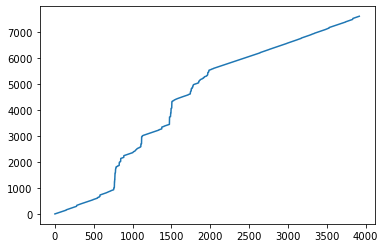

In [10]:
plt.plot(cuts_number)

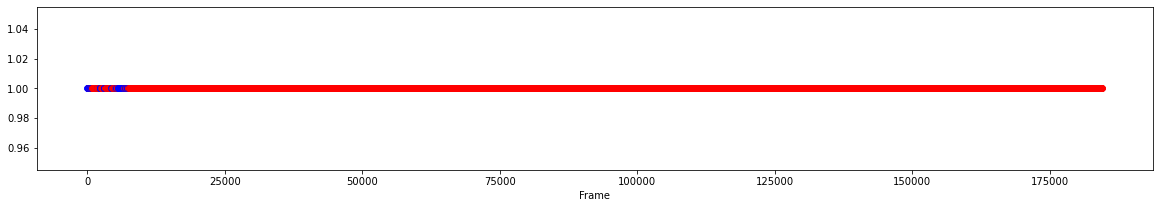

In [11]:
fig = plt.figure()
fig.set_figheight(3)
fig.set_figwidth(20)

ax = fig.add_subplot(111)
for frame in range(len(df["Frame"])):
    result = cuts_number.count(df["Frame"][frame])
    if result > 0:
        ax.scatter(df["Frame"][frame],1, color='blue', linewidth= 0.5)
    else:
        ax.scatter(df["Frame"][frame],1, color='red', linewidth= 0.5)

ax.set_xlabel("Frame")
plt.show()

In [12]:
# Секунды, на которых происходит смена действия (по моему мнению)
my_cuts_number = [6,16,27,40,52,70,80,100,120,130,164,172,178,184,225,300]

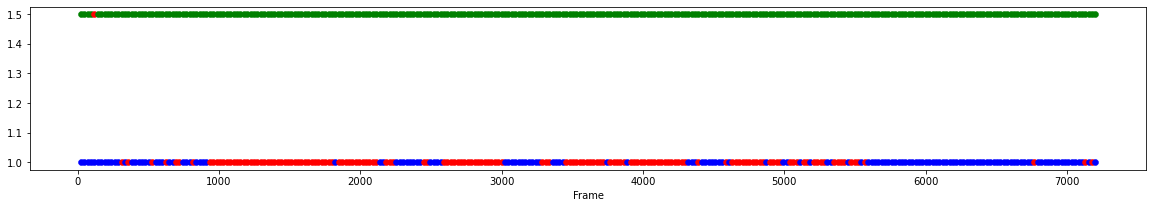

In [13]:
fig = plt.figure()
fig.set_figheight(3)
fig.set_figwidth(20)

ax = fig.add_subplot(111)
for frame in range(300):
    result = cuts_number.count(df["Frame"][frame])
    if result > 0:
        ax.scatter(df["Frame"][frame],1, color='blue', linewidth= 0.5)
    else:
        ax.scatter(df["Frame"][frame],1, color='red', linewidth= 0.5)
        
    result2 = my_cuts_number.count(df["Frame"][frame])
    if result2 > 0:
        ax.scatter(df["Frame"][frame],1.5, color='red', linewidth= 0.5)
    else:
        ax.scatter(df["Frame"][frame],1.5, color='green', linewidth= 0.5)

ax.set_xlabel("Frame")
plt.show()

In [14]:
cuts_number = sub_video(df['Right Hand index'], df)

Всего отрезков: 2626
Длина массива: 2626
[126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 147, 148, 149, 150, 151, 152, 153, 154, 163, 164, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 324, 325, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 420, 421, 422, 423, 424, 425, 426, 427

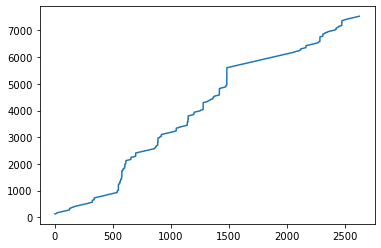

In [15]:
plt.plot(cuts_number)

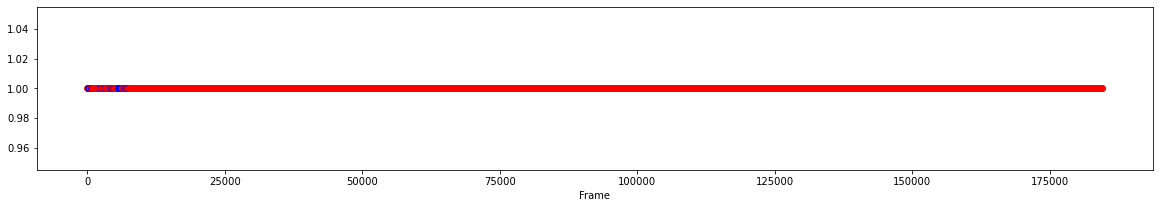

In [16]:
fig = plt.figure()
fig.set_figheight(3)
fig.set_figwidth(20)

ax = fig.add_subplot(111)
for frame in range(len(df["Frame"])):
    result = cuts_number.count(df["Frame"][frame])
    if result > 0:
        ax.scatter(df["Frame"][frame],1, color='blue', linewidth= 0.5)
    else:
        ax.scatter(df["Frame"][frame],1, color='red', linewidth= 0.5)

ax.set_xlabel("Frame")
plt.show()

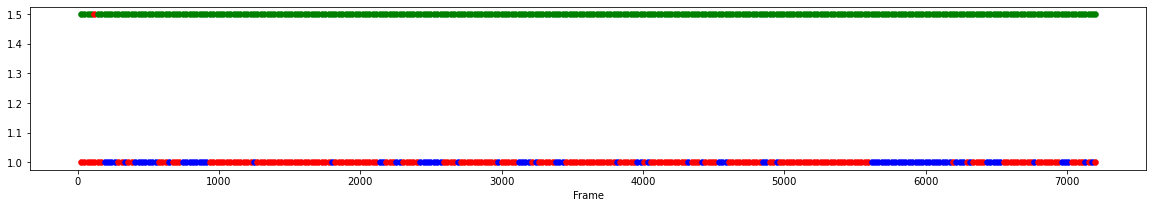

In [17]:
fig = plt.figure()
fig.set_figheight(3)
fig.set_figwidth(20)

ax = fig.add_subplot(111)
for frame in range(300):
    result = cuts_number.count(df["Frame"][frame])
    if result > 0:
        ax.scatter(df["Frame"][frame],1, color='blue', linewidth= 0.5)
    else:
        ax.scatter(df["Frame"][frame],1, color='red', linewidth= 0.5)
        
    result2 = my_cuts_number.count(df["Frame"][frame])
    if result2 > 0:
        ax.scatter(df["Frame"][frame],1.5, color='red', linewidth= 0.5)
    else:
        ax.scatter(df["Frame"][frame],1.5, color='green', linewidth= 0.5)

ax.set_xlabel("Frame")
plt.show()

In [ ]:
# define subplot grid
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

ax1 = fig.add_subplot(141, projection='3d')
ax2 = fig.add_subplot(142, projection='3d')
ax3 = fig.add_subplot(143, projection='3d')
ax4 = fig.add_subplot(144, projection='3d')

ax_1 = fig.add_subplot(241, projection='3d')
ax_2 = fig.add_subplot(242, projection='3d')
ax_3 = fig.add_subplot(243, projection='3d')
ax_4 = fig.add_subplot(244, projection='3d')

for i in range(len(df)-1):
    ax1.plot(df['Time,sec'][i:i+2],df['Left_RING_FINGER_TIP_X'][i:i+2],df['Left_RING_FINGER_TIP_Y'][i:i+2],alpha=0.2,color = 'blue')
    ax1.set_title('Left_RING_FINGER_TIP')
    ax1.set_xlabel("Time,sec")  
    
    ax2.plot(df['Time,sec'][i:i+2],df['Left_RING_FINGER_DIP_X'][i:i+2],df['Left_RING_FINGER_DIP_Y'][i:i+2],alpha=0.2,color = 'blue')
    ax2.set_title('Left_RING_FINGER_DIP')
    ax2.set_xlabel("Time,sec")  
    
    ax3.plot(df['Time,sec'][i:i+2],df['Left_RING_FINGER_PIP_X'][i:i+2],df['Left_RING_FINGER_PIP_Y'][i:i+2],alpha=0.2,color = 'blue')
    ax3.set_title('Left_RING_FINGER_PIP')
    ax3.set_xlabel("Time,sec")  
    
    ax4.plot(df['Time,sec'][i:i+2],df['Left_RING_FINGER_MCP_X'][i:i+2],df['Left_RING_FINGER_MCP_Y'][i:i+2],alpha=0.2,color = 'blue')
    ax4.set_title('Left_RING_FINGER_MCP')
    ax4.set_xlabel("Time,sec")
    
    ax_1.plot(df['Time,sec'][i:i+2],df['Right_RING_FINGER_TIP_X'][i:i+2],df['Right_RING_FINGER_TIP_Y'][i:i+2],alpha=0.2,color = 'blue')
    ax_1.set_title('Right_RING_FINGER_TIP')
    ax_1.set_xlabel("Time,sec")  
    
    ax_2.plot(df['Time,sec'][i:i+2],df['Right_RING_FINGER_DIP_X'][i:i+2],df['Right_RING_FINGER_DIP_Y'][i:i+2],alpha=0.2,color = 'blue')
    ax_2.set_title('Right_RING_FINGER_DIP')
    ax_2.set_xlabel("Time,sec")  
    
    ax_3.plot(df['Time,sec'][i:i+2],df['Right_RING_FINGER_PIP_X'][i:i+2],df['Right_RING_FINGER_PIP_Y'][i:i+2],alpha=0.2,color = 'blue')
    ax_3.set_title('Right_RING_FINGER_PIP')
    ax_3.set_xlabel("Time,sec")  
    
    ax_4.plot(df['Time,sec'][i:i+2],df['Right_RING_FINGER_MCP_X'][i:i+2],df['Right_RING_FINGER_MCP_Y'][i:i+2],alpha=0.2,color = 'blue')
    ax_4.set_title('Right_RING_FINGER_MCP')
    ax_4.set_xlabel("Time,sec")

In [18]:

import cv2

# загрузка видео
video = cv2.VideoCapture('/Users/vladislav/Documents/JupyterNotebook/ObjectDetection/Maintenance Hand Segmentation/Python Segmentation/pump_dataset/pump_videos/test_pump_video.mp4')

# определение алгоритма разделения на сцены
scene_detector = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50)
frame_number = 0
arr_frames = []
# цикл по кадрам видео
while True:
    # чтение кадра
    ret, frame = video.read()
    if not ret:
        break
    frame_number = frame_number + 1
    # применение алгоритма разделения на сцены
    mask = scene_detector.apply(frame)
    
    # определение порога для определения смены сцены
    threshold = 0.25
    if cv2.countNonZero(mask) / (mask.shape[0] * mask.shape[1]) > threshold:
        # обнаружена смена сцены
        # сохранение текущего кадра в файл или обработка его дальше
        arr_frames.append(frame_number)
        pass


# освобождение ресурсов
video.release()
cv2.destroyAllWindows()


In [19]:
arr_frames

[1,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 678,
 679,
 680,
 681,
 682,
 683,
 684,
 685,
 686,
 687,
 1253,
 1254,
 1255,
 1256,
 1266,
 1267,
 1268,
 1269,
 1432,
 1433,
 1434,
 1618,
 1619,
 1620,
 1621,
 1622,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2088,
 2089,
 2582,
 2583,
 2584,
 2585,
 2586,
 3846,
 3847,
 3848,
 3849,
 3850,
 3851,
 3852,
 3853,
 3854,
 3889,
 3890,
 3891,
 5605,
 5606,
 5607,
 5608,
 5609,
 5610,
 5611,
 5612,
 5613,
 5614,
 5658,
 5659,
 5660,
 5661,
 5662,
 5663,
 5664,
 5665,
 5666,
 5667,
 5668,
 5669,
 5670,
 5671,
 5672,
 5673,
 5674,
 5675,
 5845,
 5846,
 5847,
 5848,
 5849,
 5850,
 5851,
 5852,
 5853,
 5854,
 5855,
 5856,
 5883,
 5884,
 5885,
 5886,
 5887,
 6168,
 6169,
 6170,
 6171,
 6172,
 6173,
 6174,
 6175,
 6176,
 6177,
 6178,
 6179,
 6180,
 6181,
 6192,
 6193,
 6194,
 6195,
 6926,
 6927,
 6973,
 6974,
 6998,
 6999,
 7000,
 7482,


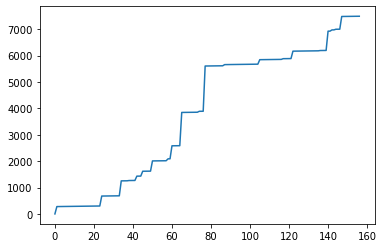

In [20]:
import matplotlib.pyplot as plt
plt.plot(arr_frames)

In [22]:

import cv2

# загрузка видео
video = cv2.VideoCapture(0)

# определение алгоритма выделения признаков
feature_detector = cv2.ORB_create()

# определение алгоритма распознавания объектов
object_detector = cv2.CascadeClassifier('hand_cascade.xml')

# цикл по кадрам видео
while True:
    # чтение кадра
    ret, frame = video.read()
    if not ret:
        break
    
    # применение алгоритма выделения признаков
    keypoints, descriptors = feature_detector.detectAndCompute(frame, None)
    
    # применение алгоритма распознавания объектов
    hands = object_detector.detectMultiScale(frame)
    
    # отображение результатов
    for (x, y, w, h) in hands:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    cv2.imshow('Hand detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
# освобождение ресурсов
video.release()
cv2.destroyAllWindows()


[ERROR:0@780.195] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/core/src/persistence.cpp (505) open Can't open file: 'hand_cascade.xml' in read mode


error: OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'
